Importing the necessary libraries

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

Problem 2)

Linear function: y = -3.85+ 10.46x


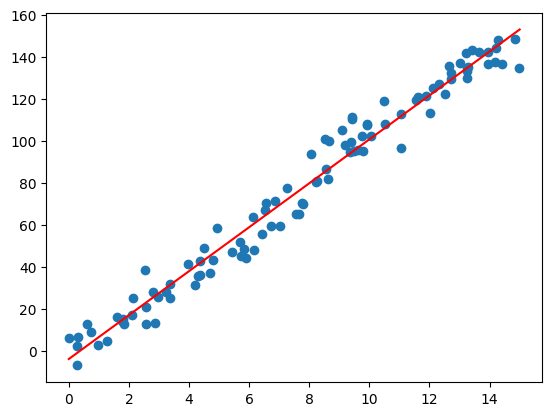

In [11]:
data = pd.read_csv("lin_df.csv", index_col=0)

x = data["X"].to_numpy()
y = data["Y"].to_numpy()

# Plotting all data points
plt.scatter(x,y)

# Calculating the terms in the formula
x_mean = np.average(x)
y_mean = np.average(y)

xy_mean = np.average(x*y)
x_squared_mean = np.average(x*x)

# Less calculations to solve theta one first, because rearranging vars shows y_mean - theta_one * x_mean = theta_nought
theta_one = (xy_mean - (x_mean*y_mean)) / (x_squared_mean - x_mean**2)
theta_nought = y_mean - theta_one*x_mean

print(f"Linear function: y = {theta_nought:.2f}+ {theta_one:.2f}x")

# Plotting the linear regression following y = theta_nought + theta_one*x
linear_x = np.linspace(0, 15, 2)
plt.plot(linear_x, theta_nought + theta_one*linear_x, color = "red")

# Show the plot
plt.show()


Problem 3)

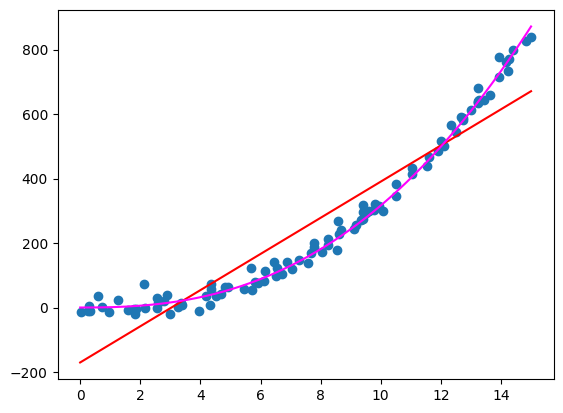

In [12]:

data = pd.read_csv("nonlin_df.csv", index_col=0)

x = data["X"].to_numpy()
y = data["Y"].to_numpy()

# Plotting all data points
plt.scatter(x,y)

# Calculating the terms in the formula
x_mean = np.average(x)
y_mean = np.average(y)

xy_mean = np.average(x*y)
x_squared_mean = np.average(x*x)

# Less calculations to solve theta one first, because rearranging vars shows y_mean - theta_one * x_mean = theta_nought
theta_one = (xy_mean - (x_mean*y_mean)) / (x_squared_mean - x_mean**2)
theta_nought = y_mean - theta_one*x_mean

# Plotting the linear regression following y = theta_nought + theta_one*x
linear_x = np.linspace(0, 15, 2)
plt.plot(linear_x, theta_nought + theta_one*linear_x, color = "red")

# Plotting y = x^2.5
linear_x = np.linspace(0,15,1000)
plt.plot(linear_x, linear_x**2.5, "magenta")

# Show the plot
plt.show()

Problem 4)

In [13]:
def distance(coor1: pd.DataFrame, row: pd.DataFrame):
    inner_product = 0

    for col in ["X", "Y"]:
        inner_product += (coor1[col] - row[col])**2

    return sqrt(inner_product)


In [14]:
def get_k_nearest_neighbors_point(k: int, coor_index: int, data: pd.DataFrame):
    current_coor = data.iloc[coor_index]

    new_data = data
    new_data = new_data.drop(coor_index)

    new_data["distance"] = new_data.apply(
        lambda row: distance(current_coor, row), axis="columns")

    new_data = new_data.sort_values(by="distance")
    new_data = new_data.head(k)

    k_coordinate = {"X": new_data["X"].mean(), "Y": new_data["Y"].mean()}

    return k_coordinate

In [15]:
def generate_knn_regression(k, data: pd.DataFrame):
    knn_data = pd.DataFrame({"X": [], "Y": []})

    for i in range(len(data)):
        knn_data.loc[len(knn_data)] = get_k_nearest_neighbors_point(k, i, data)

    return knn_data.sort_values(by="X")

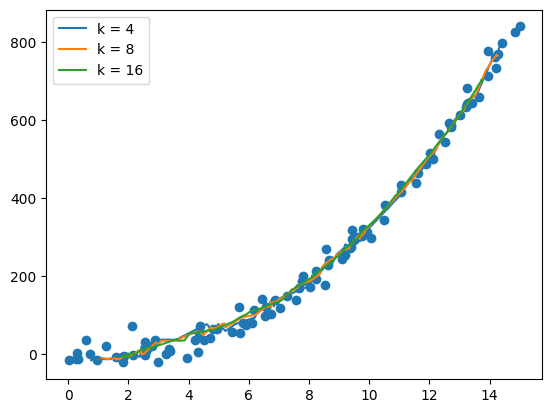

In [16]:
data = pd.read_csv("nonlin_df.csv", index_col=0)
plt.scatter(data["X"], data["Y"])

k_values = [4, 8, 16]

for k in k_values:
    knn_data = generate_knn_regression(k, data)
    plt.plot(knn_data["X"], knn_data["Y"], label=f"k = {k}")

plt.legend()
plt.show()

Problem 5)

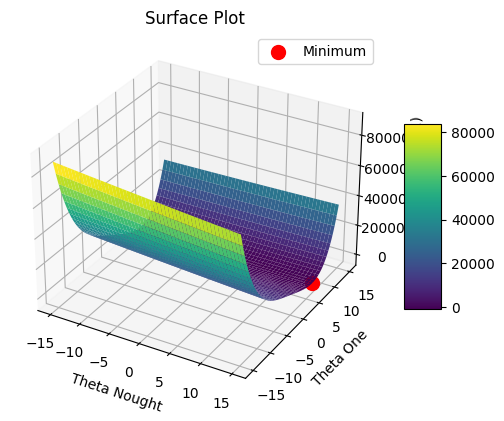

In [17]:

data = pd.read_csv("lin_df.csv", index_col=0)

x = data["X"].to_numpy()
y = data["Y"].to_numpy()

# Calculating the terms in the formula
x_mean = np.average(x)
y_mean = np.average(y)

xy_mean = np.average(x*y)
x_squared_mean = np.average(x*x)
y_squared_mean = np.average(y*y)

bound = 15
detail = 0.05

theta_0 = np.arange(-bound,bound, detail)
theta_1 = np.arange(-bound, bound, detail)

theta_0, theta_1 = np.meshgrid(theta_0, theta_1)

z =( y_squared_mean
    - 2*theta_0*y_mean 
    - 2*theta_1*xy_mean 
    + theta_0**2 
    + 2*theta_0*theta_1*x_mean 
    + (theta_1**2) * (theta_1**2))


min_index = np.unravel_index(np.argmin(z), z.shape)

# Extract the corresponding theta_0 and theta_1 values
min_theta_0 = theta_0[min_index]
min_theta_1 = theta_1[min_index]

# # Print the coordinates of the minimum z value
# print("Coordinates of the minimum z value:")
# print("Theta_0:", min_theta_0)
# print("Theta_1:", min_theta_1)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(theta_0, theta_1, z, cmap = "viridis")


# Plot the minimum point as a red dot
ax.scatter(min_theta_0, min_theta_1, np.min(z) , color='red', s=100, label='Minimum')


# Add labels and title
ax.set_xlabel('Theta Nought')
ax.set_ylabel('Theta One')
ax.set_zlabel('h(theta_0, theta_1)')
ax.set_title('Surface Plot')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.legend()
plt.show()

Problem 6)

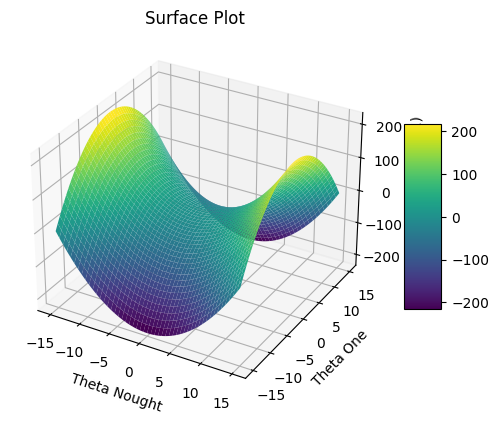

In [18]:

bound = 15
detail = 0.05

theta_0 = np.arange(-bound,bound, detail)
theta_1 = np.arange(-bound, bound, detail)

theta_0, theta_1 = np.meshgrid(theta_0, theta_1)

z = theta_0**2 - theta_1**2

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(theta_0, theta_1, z, cmap = "viridis")

# Add labels and title
ax.set_xlabel('Theta Nought')
ax.set_ylabel('Theta One')
ax.set_zlabel('g(theta_0, theta_1)')
ax.set_title('Surface Plot')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()